In [84]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [85]:
digits = load_digits() # we load the training set of 8X8 digits

In [86]:
dir(digits) #we can check what the training set contains using this funtion
#unable to use digits.head(), probably not a data frame

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [87]:
digits.data[0] #print 1st sample, it is a 1d array with t64 elements

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [88]:
digits.images[0] # the same array above is arranged in 8x8 format to form a grayscale image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

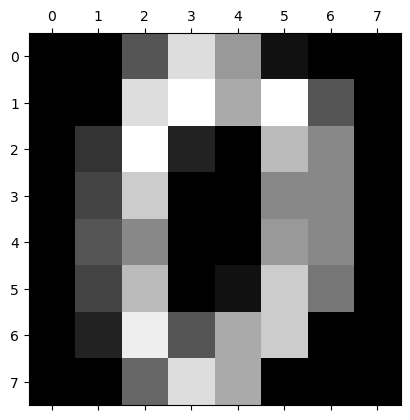

In [89]:
plt.gray()
plt.matshow(digits.images[0])

lets print 1st 5 elements

<Figure size 640x480 with 0 Axes>

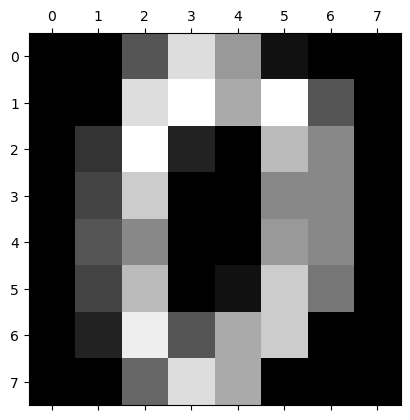

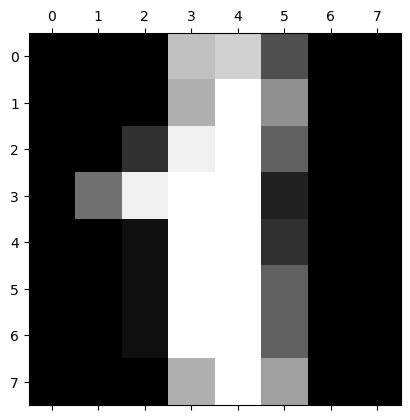

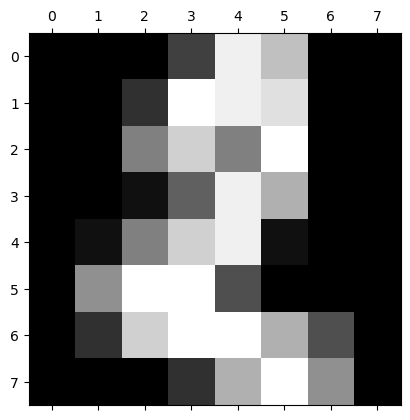

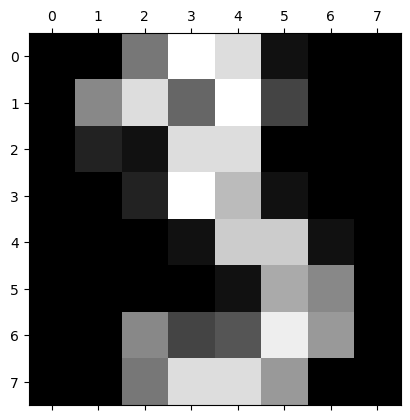

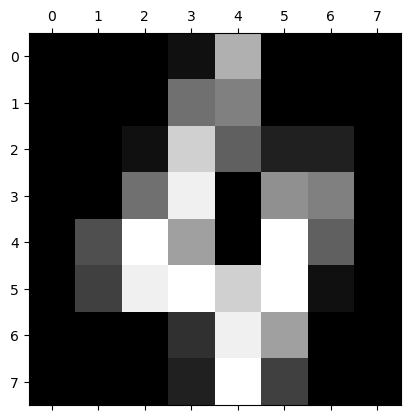

In [90]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

The target represents the ground truth or y

In [91]:
digits.target[0:5] # this is the ground truth of above mentioned images

array([0, 1, 2, 3, 4])

Now lets use the data and the target to train our model

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test =  train_test_split(digits.data, digits.target, test_size=0.2)

In [94]:
len(x_train)

1437

In [95]:
len(x_test)

360

In [96]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [97]:
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
model.score(x_test,y_test)

0.9527777777777777

The model has 95% accuracy, lets check on some individual samples

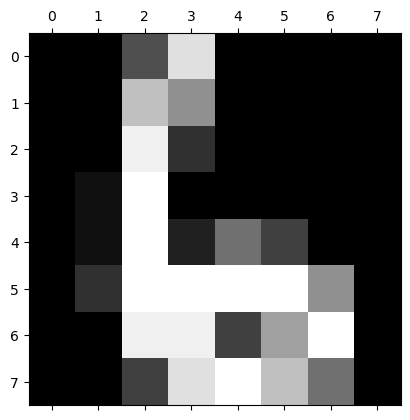

In [99]:
plt.matshow(digits.images[67])

In [100]:
digits.target[67]

6

In [101]:
model.predict([digits.data[67]])

array([6])

In [102]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

Plot the confusion matrix

In [103]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  2, 26,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 37,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  1, 28]])

Text(95.72222222222221, 0.5, 'Truth')

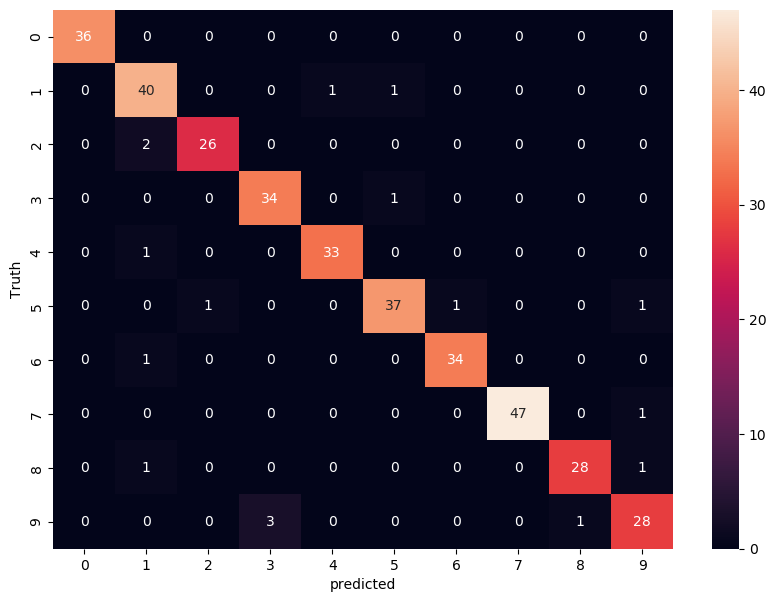

In [104]:
import seaborn as sn #seaborn is similar to matplotlib for visualization
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')


In above confusion matrix you can see that 37 times the truth was 0 and it was predicted as 0, while 1 times it was predicted as 5